In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# 1.
 A tabela abaixo mostra o resultado de medidas experimentais obtidas para se estudar a relação do tempo de germinação de sementes em função da temperatura média do solo:

| Temperatura | Germinação( dias)|
| ----------- |------------------|
   3|41
   6|29
   7|27
   8|19
   14|10
   16|11

    (i) - Ajuste uma reta de mínimos quadrados e um polinomio de segundo grau.d
    (ii)etermine o tempo de germinação para a temperatura média 10 graus.

    (iii) - Graficamente, compare os modelo e os dados fornecidos.
    (iii) - Calcule r², coeficiente de determinação, para os dois modelos.

In [11]:
# Dados
temperatura = np.array([3, 6, 7, 8, 14, 16])
germinacao = np.array([41, 29, 27, 19, 10, 11])

# Somas para o cálculo dos coeficientes da reta
n = len(temperatura)
soma_temperatura = np.sum(temperatura)
soma_germinacao = np.sum(germinacao)
soma_temperaturagerminacao = np.sum(temperatura * germinacao)
soma_temperatura2 = np.sum(temperatura ** 2)

# Cálculo dos coeficientes b1 (angular) e b0 (linear)
b1_linear = (n * soma_temperaturagerminacao - soma_temperatura * soma_germinacao) / \
            (n * soma_temperatura2 - soma_temperatura ** 2)
b0_linear = (soma_germinacao / n) - b1_linear * (soma_temperatura / n)

def reta_minimos_quadrados(x):
    return b1_linear * x + b0_linear

print("Reta de Mínimos Quadrados")
print(f"Equação da reta: y = {b1_linear:.2f}x + {b0_linear:.2f}")

Reta de Mínimos Quadrados
Equação da reta: y = -2.25x + 43.08


In [12]:
# Calculando as somas 
sum_x = np.sum(temperatura)
sum_x2 = np.sum(temperatura**2)
sum_x3 = np.sum(temperatura**3)
sum_x4 = np.sum(temperatura**4)
sum_y = np.sum(germinacao)
sum_xy = np.sum(temperatura * germinacao)
sum_x2y = np.sum(temperatura**2 * germinacao)

# Construindo a matriz A do sistema de equações normais
A = np.array([
    [sum_x4, sum_x3, sum_x2],
    [sum_x3, sum_x2, sum_x],
    [sum_x2, sum_x, n]
])

# Construindo o vetor B do sistema de equações normais
B = np.array([sum_x2y, sum_xy, sum_y])

# Resolvendo o sistema de equações para encontrar os coeficientes [a, b, c]
coefs_poly = np.linalg.solve(A, B)
a_poly, b_poly, c_poly = coefs_poly

def polinomio_segundo_grau(x):
    return a_poly * x**2 + b_poly * x + c_poly

print("\nPolinômio de Segundo Grau (Método Matricial)")
print(f"Equação do polinômio: y = {a_poly:.2f}x^2 + {b_poly:.2f}x + {c_poly:.2f}")


temp_previsao = 10

# Previsão pela reta de mínimos quadrados
germinacao_linear_10graus = reta_minimos_quadrados(temp_previsao)
print(f"\nPrevisão (Reta de Mínimos Quadrados) para 10 graus: {germinacao_linear_10graus:.2f} dias")

# Previsão pelo polinômio de segundo grau
germinacao_poly_10graus = polinomio_segundo_grau(temp_previsao)
print(f"Previsão (Polinômio de Segundo Grau) para 10 graus: {germinacao_poly_10graus:.2f} dias")


Polinômio de Segundo Grau (Método Matricial)
Equação do polinômio: y = 0.21x^2 + -6.35x + 58.87

Previsão (Reta de Mínimos Quadrados) para 10 graus: 20.58 dias
Previsão (Polinômio de Segundo Grau) para 10 graus: 16.14 dias


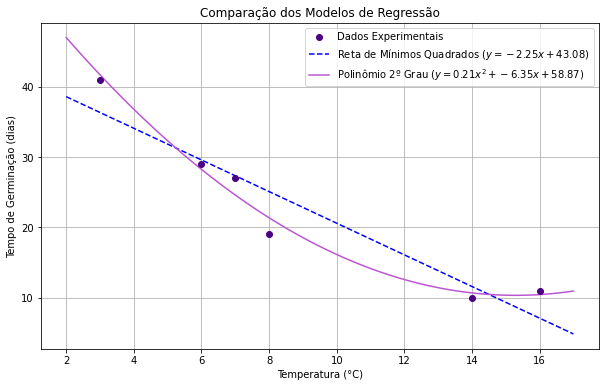

In [25]:
# Criar um array de temperaturas para plotar as curvas
temperatura_plot = np.linspace(min(temperatura) - 1, max(temperatura) + 1, 100)

# Valores preditos pela reta
germinacao_pred_linear = reta_minimos_quadrados(temperatura_plot)

# Valores preditos pelo polinômio
germinacao_pred_poly = polinomio_segundo_grau(temperatura_plot)

plt.figure(figsize=(10, 6))
plt.scatter(temperatura, germinacao, color='indigo', label='Dados Experimentais', zorder=5)
plt.plot(temperatura_plot, germinacao_pred_linear, color='blue', linestyle='--', label=f'Reta de Mínimos Quadrados ($y = {b1_linear:.2f}x + {b0_linear:.2f}$)')
plt.plot(temperatura_plot, germinacao_pred_poly, color='mediumorchid', linestyle='-', label=f'Polinômio 2º Grau ($y = {a_poly:.2f}x^2 + {b_poly:.2f}x + {c_poly:.2f}$)')

plt.title('Comparação dos Modelos de Regressão')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Tempo de Germinação (dias)')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
# Cálculo do R² para a Reta de Mínimos Quadrados
# Valores preditos pela reta para os dados originais
germinacao_pred_linear_dados = reta_minimos_quadrados(temperatura)
r2_linear = r2_score(germinacao, germinacao_pred_linear_dados)
print(f"\nCoeficiente de Determinação (R²) para a Reta de Mínimos Quadrados: {r2_linear:.4f}")

# Cálculo do R² para o Polinômio de Segundo Grau
# Valores preditos pelo polinômio para os dados originais
germinacao_pred_poly_dados = polinomio_segundo_grau(temperatura)
r2_poly = r2_score(germinacao, germinacao_pred_poly_dados)
print(f"Coeficiente de Determinação (R²) para o Polinômio de Segundo Grau: {r2_poly:.4f}")


Coeficiente de Determinação (R²) para a Reta de Mínimos Quadrados: 0.8906
Coeficiente de Determinação (R²) para o Polinômio de Segundo Grau: 0.9813


# 2. 
Abaixo o levantamento do número de espécies ,$y$, em uma amostra de $x$ peixes, colhidas durante dois anos.
Escolha, com fundamentação, uma modelo dentre polinômio linear, quadrático ou cúbico.


| x | y  |
|---|----|
13 |11 |
15 |  10|
16 |11| 
21 | 12|
22 | 12|
23 | 13|
25 | 12|
29 | 14|
30 | 16 |
31 | 17 |
36 | 13|
40 | 14|
42 | 22|
55 | 14|
60 | 21|
62 | 21|
64 | 24|
70 | 17|
72 | 23|
100| 23|
130 | 34|

Coeficientes dos Modelos: 

Modelo Linear (y = b1*x + b0):  
0.1803 x + 8.648
Modelo Quadrático (y = a*x^2 + b*x + c):            2
3.333e-05 x + 0.1761 x + 8.743
Modelo Cúbico (y = a*x^3 + b*x^2 + c*x + d):            3           2
3.051e-05 x - 0.00627 x + 0.5294 x + 3.725

Coeficientes de Determinação (R²)
R² (Linear): 0.8155
R² (Quadrático): 0.8155
R² (Cúbico): 0.8388


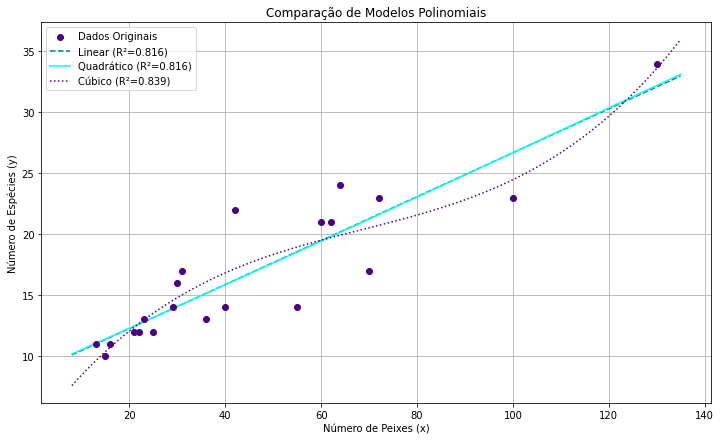

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Dados
x = np.array([13, 15, 16, 21, 22, 23, 25, 29, 30, 31, 36, 40, 42, 55, 60, 62, 64, 70, 72, 100, 130])
y = np.array([11, 10, 11, 12, 12, 13, 12, 14, 16, 17, 13, 14, 22, 14, 21, 21, 24, 17, 23, 23, 34])

# Modelo Linear (Grau 1)
coefs_linear = np.polyfit(x, y, 1)
poly_linear = np.poly1d(coefs_linear) 

# Modelo Quadrático (Grau 2)
coefs_quadratic = np.polyfit(x, y, 2)
poly_quadratic = np.poly1d(coefs_quadratic)

# Modelo Cúbico (Grau 3)
coefs_cubic = np.polyfit(x, y, 3)
poly_cubic = np.poly1d(coefs_cubic)

print("Coeficientes dos Modelos: \n")
print(f"Modelo Linear (y = b1*x + b0): {poly_linear}")
print(f"Modelo Quadrático (y = a*x^2 + b*x + c): {poly_quadratic}")
print(f"Modelo Cúbico (y = a*x^3 + b*x^2 + c*x + d): {poly_cubic}")


y_pred_linear = poly_linear(x)
y_pred_quadratic = poly_quadratic(x)
y_pred_cubic = poly_cubic(x)

r2_linear = r2_score(y, y_pred_linear)
r2_quadratic = r2_score(y, y_pred_quadratic)
r2_cubic = r2_score(y, y_pred_cubic)

print("\nCoeficientes de Determinação (R²)")
print(f"R² (Linear): {r2_linear:.4f}")
print(f"R² (Quadrático): {r2_quadratic:.4f}")
print(f"R² (Cúbico): {r2_cubic:.4f}")


plt.figure(figsize=(12, 7))
plt.scatter(x, y, color='indigo', label='Dados Originais', zorder=5)

x_plot = np.linspace(min(x) - 5, max(x) + 5, 200)

plt.plot(x_plot, poly_linear(x_plot), color='teal', linestyle='--', label=f'Linear (R²={r2_linear:.3f})')
plt.plot(x_plot, poly_quadratic(x_plot), color='aqua', linestyle='-', label=f'Quadrático (R²={r2_quadratic:.3f})')
plt.plot(x_plot, poly_cubic(x_plot), color='indigo', linestyle=':', label=f'Cúbico (R²={r2_cubic:.3f})')

plt.title('Comparação de Modelos Polinomiais')
plt.xlabel('Número de Peixes (x)')
plt.ylabel('Número de Espécies (y)')
plt.legend()
plt.grid(True)
plt.show()